In [ ]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install transformers==3 
!pip install torch

!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.1 MB 143 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 344 kB 8.3 MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp37-cp37m-linux_x86_64.whl size=595753 sha256=a332a507ea92daeb072786ddf3f1afd44aebf26d23369a485976a13a9584bba6
  Stored in directory: /root/.cache/pip/wheels/be/b4/06/7f3fdfaf707e6b5e98b79c041e023acffbe395d78a527eae00
Successfully built gluonnlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 7.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook

from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [ ]:
##GPU 사용 시
device = torch.device("cuda:0")

bertmodel, vocab = get_pytorch_kobert_model()

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/nlp_liflow/

/content/drive/My Drive/nlp_liflow


In [ ]:
!ls

자연어처리_1.ipynb		  item_all_GloVe_DBSCAN.csv
자연어처리_2.ipynb		  item_all_glove_k-means.csv
all_df_with_tokens.csv		  ko.bin
all_sen.csv			  list_to_csv.csv
cc.ko.300.bin.gz		  nlp_tokenizer.ipynb
df_all				  스포츠_sen.csv
df_all.csv			  sen.csv
df_all_GloVe.csv		  sen_preprocessig.csv
df_all_tfidf.csv		  스포츠_sen_prerprocessing.csv
doc2vec_100.model		  sentence_Summarizer.ipynb
feature.pkl			  textrank
feature.pkl.mtx			  textrank_git
first_embedding_clustering.model  tfidftransformer.pkl
glove_model_100.model		  자연어처리_tomotopy_HDPModel.ipynb
glove_model.model		  자연어처리_tomotopy.ipynb
glove_word_dict_128.pickle	  자연어처리_tomotopy_modeling.ipynb
item_1.csv			  vectorizer.pkl
item_all.csv			  word2vec_model
item_all_doc2vec_k-means.csv


In [ ]:
import pandas as pd
df = pd.read_csv('item_all_doc2vec_k-means.csv')
df = df.iloc[:,[2, 1]]
df

,convrs,cluster
0,침피언스 리그 올해 일등을 했으면 한다 그런 나의 바람이 또 있는 거지,0
1,올래는 아무래도 받쳐 주는 힘이 조금 많이 약했으니까 외국인 투수들이 더 분발하면 좋겠어,0
2,참피언 리그 올해 일등을 했으면 한다 그런 나의 바램도 또 있는 거지,0
3,챔피언 리그 올해 일등을 했으면 한다 그런 나의 바람이 또 있는 거지,0
4,저는 아까 말씀하신 것처럼 우승할 때는 그 외국인 투수들이 잘 해왔잖아요,0
...,...,...
3762,세계 상금 랭킹 일위가 우리나라 선수고 그리고 다승 일위도 우리나라 선수야,12
3763,이번에 수영대회는 유니버설 대회만 몬하더라고 홍보가 덜 됐나,12
3764,이번에 많이 깨달았고 그래서 이번에는 정말로 내 자신과 약속도 했어,12
3765,너 덕분에 이번에는 정말 나도 잘할 수 있을 것 같아 자신감이 생겼어,12


In [ ]:
df.isnull().sum()

convrs     0
cluster    0
dtype: int64

In [ ]:
np.unique(df.cluster)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
idx = df[df['cluster']==5].index
df = df.drop(idx)

In [ ]:
np.unique(df.cluster)

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
#df.loc[(df['cluster']== 5), 'cluster'] = 4
df.loc[(df['cluster']== 6), 'cluster'] = 5
df.loc[(df['cluster']== 7), 'cluster'] = 6
df.loc[(df['cluster']== 8), 'cluster'] = 0
np.unique(df.cluster)


array([ 0,  1,  2,  3,  4,  5,  6,  9, 10, 11, 12])

In [ ]:
df.loc[(df['cluster']== 9), 'cluster'] = 7
df.loc[(df['cluster']== 10), 'cluster'] = 8
df.loc[(df['cluster']== 11), 'cluster'] = 9
df.loc[(df['cluster']== 12), 'cluster'] = 10

In [ ]:
np.unique(df.cluster)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['convrs'], df['cluster'], stratify=df['cluster'], test_size=0.2, shuffle=True, random_state=34)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, stratify=y_test, test_size=0.5, shuffle=True, random_state=34)

In [ ]:
train = []
for q, label in zip(x_train, y_train)  :
    data = []
    data.append(q)
    data.append(str(label))

    train.append(data)

In [ ]:
test = []
for q, label in zip(x_test, y_test)  :
    data = []
    data.append(q)
    data.append(str(label))

    test.append(data)

In [ ]:
val = []
for q, label in zip(x_val, y_val)  :
    data = []
    data.append(q)
    data.append(str(label))

    val.append(data)

In [ ]:
len(train)

2313

In [ ]:
train

[['그래서 그걸 생각하면서  다른 거 아무것도 생각 안 하고 리듬만 신경 썼어', '9'],
 ['전에 우리 같이 당구 쳤었잖아  솔직히 기분이 별로 안 좋았었어', '7'],
 ['친구들한테 한번 알아봐요 나도 골프 한번 해 보려고 한다  뭐부터 해야 되냐', '9'],
 ['내가 봤을 때에는 동생도 팔십대 중반이나 싱글 이정도 칠수 있을 것 같아', '9'],
 ['당신이 야구 좋아하는 거 알지 나도 좋아해 근데 너무 거기에만 집중하는 것 같아', '0'],
 ['완전히 종아리가 팽창되어서 다리에 물이랑 피가 차서 너무 아팠어', '3'],
 ['우리 정말 끝까지 포기하지 않고 이  끈기 있게 평생 동안 해보자', '1'],
 ['나이도 나도 많이 먹어갖구 그렇게 다른 사람마냥 잘할지는 모르겠네', '9'],
 ['조금씩 쪼개고 조금씩 모아 가면서 또 쓰고 하면 그걸로 되겠지', '1'],
 ['자네가 야구에 대한 관심이 많다 보니까 나도 요즘에 야구를 조금 보게 돼', '0'],
 ['집이는 건강 유지를 어떻게 하고는 거여 어떻게 관리하고 있어', '1'],
 ['나중에는 시장도 봐 오더라고 놀랐어 정말 걷기에 효과가 있는 모양이야', '1'],
 ['그런데 다시 또 건강이 별로 안 좋다 보니까 스포츠를 권장을 안 하더라고', '1'],
 ['나도 그동안에는 피곤하니까 항상 힘들다는 생각이 먼저 들었던 것 같아', '1'],
 ['이 부분에서 이렇게 하면 좋겠다  근데 그게 안 되는 거니까 스트레스를 받는 거지', '0'],
 ['쇼트트랙도 우리나라 선수들이 얼마나 잘 하냐고 금메달 밭이야', '10'],
 ['왜 그렇게 하냐면 떨어진 거리가 오르막일 때가 있고 내리막일 때가 있어', '8'],
 ['그랬는데 히딩크 감독이 오면서 이천이 월드컵에서 사 강에 올라갔잖아', '4'],
 ['그럴 수도 있는데  어쨌든 그거는 좀 아닌 거 같고  좀 인성에 문제가 있는 것 같아', '5'],
 ['그런 거는  괜찮은데 연령대가 생각보다 상당히 높더라고 거의 다

In [ ]:
len(test)

290

In [ ]:
test

[['그치 좀 근력을 좀 키우고 할 수 있는 운동을 찾아 가지고 적극적으로 좀 알아 봐', '3'],
 ['그런데  어쨌든 간에 삼개월만 버티면 기본자세는 나온다고', '3'],
 ['그렇게 바라보고는 있지만 정말 볼 때마다 좀 안타깝기도 하고 답답하기도 하드라고', '0'],
 ['그러니까 유럽이나 아프리카  이쪽에서 태권도가 아주 선양하고 있을 거 같아', '10'],
 [' 그래서 결과 보고 하다 보면 전반기 후반기 해서 일년이 금방 지나가 버린 것 같아요', '0'],
 ['그동안 운동을 안 했구나  호흡이 중요하구나  라는 생각은 드네', '1'],
 ['시골에 가서 일도 좀 하고 주중에는 탁구도 치고 하는 게 좋은 거 같애', '1'],
 ['그러니까 일부러 시간을 맞춰서 하는 것도 좋지만 일상처럼 시간을  돼요', '1'],
 ['이번에 수영대회는 유니버설  못하더라고 홍보가 덜 됐나', '10'],
 ['정부 자체에서도 지금 많이 보급하고 있지만  혜택을 못 보는  있고', '10'],
 [' 소송 중이라고 하더라고', '10'],
 ['계속 밖에서 걸어 다니며 운동하고 싶으면   골프 그게 괜찮은 거 같아', '8'],
 ['아침에 제가 우리 막둥이 운동시킬 때 명암지 쪽으로 가 보면 사람이 많아요', '1'],
 ['그래도 괜찮았는데 이거는 위에다 띄어놓고 치는 거잖아', '1'],
 ['저번에는 야영장에 놀러 갔다 온 적 있거든  간 김에 수영을 해 봤어', '1'],
 ['일주일 동안 치료를 하는데 피가 빠지고 나면 물이 고인다 하더라고', '3'],
 ['그런데 어느 운동을 해도 들어가는 게 다 있어  보링도 마찬가지고', '7'],
 ['같이 다닐 수 있을 정도로는 자네가 신경 써서 집에서 많이 가르쳐 줘', '7'],
 ['스쿼트를 백 팔십번을 했대 깜짝 놀랐어 걔는 요가도 한번 하고 나오잖아', '3'],
 ['막 청주씨씨도 가서 치고 그랬었는데  지금은 씨씨 이름이 다른 걸로 바뀌었대', '4'],
 ['그래서 뭔가 더 잘치고 싶

In [ ]:
len(val)

289

In [ ]:
val

[['그리고 운동은 조금 과하다 싶을 정도로 중독이 되어 있어야 돼', '1'],
 ['한국 사람들은 등산으로 겨울 산에 올라가는데 장비가 완전 에레베스트 급이라고', '10'],
 ['괜히 짜고 치는 것 같아서 그래서 이것들하고는 다시는 당구를 치지 ', '7'],
 ['지금 중국에 김신욱 걔도 네게임인가 여섯개인가에 열골 이상 넣었잖아', '2'],
 ['계속 밖에서 걸어 다니며 운동하고 싶으면  파크 골프 그게 괜찮은 거 같아', '9'],
 ['그래서 그런 거 보면 박항서 감독은 진짜 대한민국 애국자다  그런 생각이 들어', '4'],
 ['그래서  없어 아까  골프도 잠깐  볼링이 나은 거 같아', '7'],
 ['날마다 배우는 게 조금씩 다르기는 하지만 물장구치는 기초부터 배워', '9'],
 ['골프도 집중력이나 근력 향상에 좋은 운동이니까 한번 해보는 게 좋을 것 같아', '3'],
 ['여러 가지로 도움   내가 건강해지면 맛있는 것도 먹으러 가자', '1'],
 ['근데 그게 공보기가 엄청 어렵더라고', '1'],
 ['우리 집에도 자전거 타는 사람 한사람 있잖아 어제도 타러 간다고 하는 거야', '5'],
 ['멀리 갈 수 있는 상황이 아니었으니까 계룡산 근처에 있는 곳을 많이 갔었어', '0'],
 ['탁구가 나이 먹어서는 할 수 있는 운동 중에 그래도 제일 괜찮은 것 같애', '9'],
 ['수영장 한번도 가 본 적이 없어서 너 도움이 필요할 것 같아 도와줘', '1'],
 ['두명 있는데 일단은 둘렛길을 잘 걸을 수 있도록 워밍업을 해보자', '8'],
 ['거기에 맛 들이면 그 숲에 대한 추억도 생겨', '0'],
 ['올림픽에서 우리나라 최초로 금메달을 딴 선수 이름이 뭐더라', '10'],
 ['너무 진짜 시간도 잘 가고 건강에도 좋고 너무 좋은 것 같애', '1'],
 ['올래는 아무래도 받쳐 주는 힘이 조금 많이 약했으니까 외국인 투수들이 더 분발하면 좋겠어', '0'],
 ['그런데 그게 또 안 좋은 점이 있더라고 스포츠에 

In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len, pad, pair):
        transform = nlp.data.BERTSentenceTransform(bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)
        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [ ]:
# Setting parameters
max_len = 64
batch_size = 64
warmup_ratio = 0.1
num_epochs = 30
max_grad_norm = 1
log_interval = 200
learning_rate = 5e-5

In [ ]:
#토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

data_train = BERTDataset(train, 0, 1, tok, max_len, True, False)
data_val = BERTDataset(val, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(test, 0, 1, tok, max_len, True, False)

using cached model. /content/drive/MyDrive/nlp_liflow/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
# pytorch용 DataLoader 사용
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
val_dataloader = torch.utils.data.DataLoader(data_val, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes = 11, 
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)
      

In [ ]:
model = BERTClassifier(bertmodel, dr_rate=0.5).to(device)

In [ ]:
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

In [ ]:
# 옵티마이저 선언
optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss() # softmax용 Loss Function 정하기 <- binary classification도 해당 loss function 사용 가능

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)


In [ ]:
# 학습 평가 지표인 accuracy 계산 
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [ ]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
# 모델 학습 시작
for e in range(num_epochs):
    train_acc = 0.0
    val_acc = 0.0
    
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm) # gradient clipping
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
  
    model.eval() # 평가 모드로 변경
    
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(val_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        val_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, val_acc / (batch_id+1)))
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 2.4874608516693115 train acc 0.109375
epoch 1 train acc 0.33628941441441446


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 1 test acc 0.7542613636363636


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 1.4790350198745728 train acc 0.921875
epoch 2 train acc 0.9704391891891891


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 2 test acc 0.8318181818181818


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.5205844640731812 train acc 1.0
epoch 3 train acc 0.987331081081081


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 3 test acc 0.7489583333333333


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.27649495005607605 train acc 0.96875
epoch 4 train acc 0.9780405405405406


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 4 test acc 0.7610795454545455


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.09837335348129272 train acc 1.0
epoch 5 train acc 0.980152027027027


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 5 test acc 0.8009469696969698


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 6 batch id 1 loss 0.052218567579984665 train acc 1.0
epoch 6 train acc 0.9793074324324325


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 6 test acc 0.7520833333333333


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 7 batch id 1 loss 0.22204409539699554 train acc 0.921875
epoch 7 train acc 0.9771959459459459


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 7 test acc 0.7550189393939395


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 8 batch id 1 loss 0.1945650726556778 train acc 0.953125
epoch 8 train acc 0.9708614864864865


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 8 test acc 0.7983901515151516


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 9 batch id 1 loss 0.03650231286883354 train acc 1.0
epoch 9 train acc 0.9818412162162162


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 9 test acc 0.7886363636363637


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 10 batch id 1 loss 0.12120579183101654 train acc 0.96875
epoch 10 train acc 0.9864864864864865


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 10 test acc 0.7767045454545455


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 11 batch id 1 loss 0.03408466652035713 train acc 1.0
epoch 11 train acc 0.9894425675675675


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 11 test acc 0.7886363636363637


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 12 batch id 1 loss 0.12652726471424103 train acc 0.984375
epoch 12 train acc 0.9890202702702703


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 12 test acc 0.8079545454545455


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 13 batch id 1 loss 0.1388915628194809 train acc 0.96875
epoch 13 train acc 0.9894425675675675


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 13 test acc 0.8073863636363636


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 14 batch id 1 loss 0.01479235477745533 train acc 1.0
epoch 14 train acc 0.9911317567567568


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 14 test acc 0.8228219696969697


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 15 batch id 1 loss 0.012010881677269936 train acc 1.0
epoch 15 train acc 0.9949324324324325


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 15 test acc 0.8136363636363637


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 16 batch id 1 loss 0.010890023782849312 train acc 1.0
epoch 16 train acc 0.9940878378378378


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 16 test acc 0.8167613636363636


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 17 batch id 1 loss 0.008183221332728863 train acc 1.0
epoch 17 train acc 0.995777027027027


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 17 test acc 0.8105113636363637


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 18 batch id 1 loss 0.008260716684162617 train acc 1.0
epoch 18 train acc 0.997043918918919


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 18 test acc 0.8263257575757577


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 19 batch id 1 loss 0.007702122442424297 train acc 1.0
epoch 19 train acc 0.9966216216216216


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 19 test acc 0.8169507575757576


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 20 batch id 1 loss 0.007376731373369694 train acc 1.0
epoch 20 train acc 0.997043918918919


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 20 test acc 0.7982007575757576


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 21 batch id 1 loss 0.007344976998865604 train acc 1.0
epoch 21 train acc 0.9987331081081081


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 21 test acc 0.8292613636363637


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 22 batch id 1 loss 0.005699374713003635 train acc 1.0
epoch 22 train acc 0.9991554054054054


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 22 test acc 0.8230113636363636


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 23 batch id 1 loss 0.005181225016713142 train acc 1.0
epoch 23 train acc 0.9987331081081081


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 23 test acc 0.8200757575757576


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 24 batch id 1 loss 0.005696567706763744 train acc 1.0
epoch 24 train acc 0.9987331081081081


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 24 test acc 0.8167613636363636


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 25 batch id 1 loss 0.005026538390666246 train acc 1.0
epoch 25 train acc 0.9995777027027027


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 25 test acc 0.8167613636363636


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 26 batch id 1 loss 0.005206624045968056 train acc 1.0
epoch 26 train acc 0.9995777027027027


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 26 test acc 0.8167613636363636


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 27 batch id 1 loss 0.0055521344766020775 train acc 1.0
epoch 27 train acc 0.9991554054054054


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 27 test acc 0.8167613636363636


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 28 batch id 1 loss 0.005258344579488039 train acc 1.0
epoch 28 train acc 0.9995777027027027


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 28 test acc 0.8167613636363636


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 29 batch id 1 loss 0.004629016853868961 train acc 1.0
epoch 29 train acc 0.9995777027027027


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 29 test acc 0.8167613636363636


  0%|          | 0/37 [00:00<?, ?it/s]

epoch 30 batch id 1 loss 0.004441448953002691 train acc 1.0
epoch 30 train acc 0.9991554054054054


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 30 test acc 0.8167613636363636


In [ ]:
def calc_max(X):
  max_vals, max_indices = torch.max(X, 1)
  return max_indices

In [ ]:
test_df = pd.DataFrame(test, columns = ['convra', 'cluster'])

In [ ]:
test_df

,convra,cluster
0,그치 좀 근력을 좀 키우고 할 수 있는 운동을 찾아 가지고 적극적으로 좀 알아 봐,3
1,그런데 어쨌든 간에 삼개월만 버티면 기본자세는 나온다고,3
2,그렇게 바라보고는 있지만 정말 볼 때마다 좀 안타깝기도 하고 답답하기도 하드라고,0
3,그러니까 유럽이나 아프리카 이쪽에서 태권도가 아주 선양하고 있을 거 같아,10
4,그래서 결과 보고 하다 보면 전반기 후반기 해서 일년이 금방 지나가 버린 것 같아요,0
...,...,...
285,그러면 신기하게도 또 잘 쳐져요 근데 문제는 다음 날 가면 잘 안 풀려요,5
286,근데 박항서를 보니까 젊었을 때부터 자기가 얼마나 열심히 공부했는지 모른대,4
287,골프 이렇게 많이 나오니 또 그것도 이제 약간 씁쓸한 거 같고 그렇더라고,9
288,해외여행을 가려고 마음 먹으면 일주일 전부터 요가를 해,1


In [ ]:
# 테스트 문장 예측

y_pred = []
y_true = []

unseen_test = test_df
unseen_values = unseen_test.values
test_set = BERTDataset(unseen_values, 0, 1, tok, max_len, True, False)
test_input = torch.utils.data.DataLoader(test_set, batch_size=1, num_workers=5)

for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_input)):
  token_ids = token_ids.long().to(device)
  segment_ids = segment_ids.long().to(device)
  valid_length= valid_length
  label = label.long().to(device)
  out = model(token_ids, valid_length, segment_ids)
  #test_acc += calc_accuracy(out, label)
  #print(out)
  prediction = calc_max(out)
  y_pred.append(prediction)
  y_true.append(label)

#print(y_pred)
#print(y_true)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/290 [00:00<?, ?it/s]

In [ ]:
y_trues = []
for i in range(len(y_true)):
  true = y_true[i].data.cpu().numpy()
  y_trues.append(true)

In [ ]:
y_predictions = []
for i in range(len(y_pred)):
  pred = y_pred[i].data.cpu().numpy()
  y_predictions.append(pred)

In [ ]:
test_df['y_true'] = y_trues
test_df['y_prediction'] = y_predictions
test_df

,convra,cluster,y_true,y_prediction
0,그치 좀 근력을 좀 키우고 할 수 있는 운동을 찾아 가지고 적극적으로 좀 알아 봐,3,[3],[3]
1,그런데 어쨌든 간에 삼개월만 버티면 기본자세는 나온다고,3,[3],[3]
2,그렇게 바라보고는 있지만 정말 볼 때마다 좀 안타깝기도 하고 답답하기도 하드라고,0,[0],[0]
3,그러니까 유럽이나 아프리카 이쪽에서 태권도가 아주 선양하고 있을 거 같아,10,[10],[10]
4,그래서 결과 보고 하다 보면 전반기 후반기 해서 일년이 금방 지나가 버린 것 같아요,0,[0],[0]
...,...,...,...,...
285,그러면 신기하게도 또 잘 쳐져요 근데 문제는 다음 날 가면 잘 안 풀려요,5,[5],[5]
286,근데 박항서를 보니까 젊었을 때부터 자기가 얼마나 열심히 공부했는지 모른대,4,[4],[4]
287,골프 이렇게 많이 나오니 또 그것도 이제 약간 씁쓸한 거 같고 그렇더라고,9,[9],[9]
288,해외여행을 가려고 마음 먹으면 일주일 전부터 요가를 해,1,[1],[9]


In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score
confusion_matrix(y_trues, y_predictions)

array([[35,  1,  4,  1,  0,  1,  0,  1,  1,  1,  3],
       [ 2, 40,  1,  4,  0,  1,  0,  0,  1,  2,  0],
       [ 2,  2, 20,  0,  0,  0,  1,  1,  0,  0,  0],
       [ 0,  4,  0, 19,  0,  1,  0,  0,  1,  0,  0],
       [ 1,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  0,  1,  1,  2,  0,  0,  1,  2],
       [ 0,  2,  1,  0,  0,  1,  0, 11,  1,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 14,  1,  0],
       [ 0,  4,  0,  0,  0,  0,  1,  2,  2, 40,  0],
       [ 2,  1,  1,  0,  0,  1,  1,  0,  0,  1, 18]])

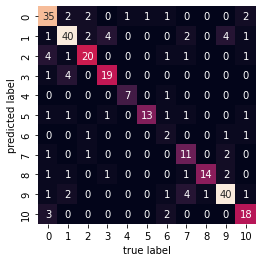

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mat = confusion_matrix(y_trues, y_predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
precision = precision_score(y_trues, y_predictions, average = 'weighted')
precision

0.7532190435313216

In [ ]:
recall = recall_score(y_trues, y_predictions, average = 'weighted')
recall

0.7551724137931034

In [ ]:
f1score = f1_score(y_trues, y_predictions, average= 'weighted')
f1score

0.7501552279930948

In [ ]:
# 테스트 문장 예측
test_sentence = '요즘 자전거가 재미있어'
test_label = 6

unseen_test = pd.DataFrame([[test_sentence, test_label]], columns = [['convrs', 'cluster']])
unseen_values = unseen_test.values
test_set = BERTDataset(unseen_values, 0, 1, tok, max_len, True, False)
test_input = torch.utils.data.DataLoader(test_set, batch_size=1, num_workers=5)

for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_input)):
  token_ids = token_ids.long().to(device)
  segment_ids = segment_ids.long().to(device)
  valid_length= valid_length
  out = model(token_ids, valid_length, segment_ids)
  print(out)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.5598, -0.8594,  7.1713, -1.2698, -0.4973, -1.2610, -0.7661, -0.1728,
         -0.8273, -0.7362, -0.7935]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


In [ ]:
class summarization():
  def __init__(self,convrs,model):
        self.model = model
        self.convrs = convrs

  def summarize(self):
    self.summ_result = [0 for i in range(11)]
    self.len = len(self.convrs)
    for i in self.convrs:
      print(i)
      data = [i, '0']
      dataset_another = [data]
      another_test = BERTDataset(dataset_another, 0, 1, tok, max_len, True, False)
      test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)
     
      model.eval()

      for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length= valid_length
        label = label.long().to(device)

        out = model(token_ids, valid_length, segment_ids)

        print(out)

        for i in out:
          logits=i
          logits = logits.detach().cpu().numpy()
          print("주제 : " , np.argmax(logits))
          self.summ_result[np.argmax(logits)]+=1
          print()
    for i in range(len(self.summ_result)):
      print(i, "번째 주제가", self.summ_result[i]/self.len*100, "% 차지합니다." )

## 새로운 문장으로 분류

In [ ]:
lst = ['내가 어제 뭘 했냐면', '자전거를 탔는데', '넘어질 것 같더라고', '그래서 연습을 얼마나 했는지 몰라', '꾸준히 하면 괜찮아 지겠지?', '잘 해보고 싶은데 그게 잘 안돼']
conv1 = summarization(lst, model)
conv1.summarize()

내가 어제 뭘 했냐면


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.8770, -0.8044, -0.6465, -1.5444, -0.6034, -0.3297, -0.1381, -0.3907,
         -1.2982,  7.4030, -0.3587]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

자전거를 탔는데


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.5061, -0.3586, -1.0002, -0.5722, -0.5326,  7.1297, -0.2432, -0.4940,
         -0.4668, -0.7423, -0.6745]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  5

넘어질 것 같더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.7016,  2.9452, -1.6431,  6.1300, -0.7272, -1.2586, -0.6044, -0.7795,
         -0.8417, -0.3793, -1.5925]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  3

그래서 연습을 얼마나 했는지 몰라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.4834, -0.4400, -0.9515, -0.5570, -0.5511,  7.1264, -0.2847, -0.4669,
         -0.4317, -0.7403, -0.6947]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  5

꾸준히 하면 괜찮아 지겠지?


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.5672,  7.9918, -0.6342,  0.0109, -1.0134, -0.4366, -0.9235, -0.3407,
         -0.7662, -0.4372, -0.9736]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  1

잘 해보고 싶은데 그게 잘 안돼


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.4133,  1.9811, -1.2319, -0.6146, -1.5356, -0.4184, -1.0034, -0.9837,
          0.2576, -1.1864, -1.0224]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

0 번째 주제가 16.666666666666664 % 차지합니다.
1 번째 주제가 16.666666666666664 % 차지합니다.
2 번째 주제가 0.0 % 차지합니다.
3 번째 주제가 16.666666666666664 % 차지합니다.
4 번째 주제가 0.0 % 차지합니다.
5 번째 주제가 33.33333333333333 % 차지합니다.
6 번째 주제가 0.0 % 차지합니다.
7 번째 주제가 0.0 % 차지합니다.
8 번째 주제가 0.0 % 차지합니다.
9 번째 주제가 16.666666666666664 % 차지합니다.
10 번째 주제가 0.0 % 차지합니다.


In [ ]:
lst2 = ['어제 탁구 시합할 때 빽 서브 연습을 안 하고 하니까 서브가 그게 잘 들어가던데 잘 안되더라 연습을 하고 가야겠어 연습을 조금만 하니까 공이 허공으로 뜨고 그러니까 상대방이 바로 때리니까 안 좋기는 안 좋더라고',
  '가끔가다 한 번씩 때려주면 좋을 텐데 진짜 시합 할 때 빽 서브도 좋지만 화서브도 넣고 커트도 잘 되는데 커트가 잘 안될 때도 있잖 근데 빽 서브만 넣으면 안 되겠어 화서브 넣어도 상대방이 잘 알아서 때리니까 좀 그렇더라고 처음에 서브 넣으면 막 때리고 그러니까 한 번 때려 갖고 들어가면 기분이 안좋고 그날 진짜 플레이가 안 되더라고',
  '그런데 커트로 수비도 잘 하고 스매싱도 잘 하는데 단식보다 이제 복식 하면 뒤에서 스매싱으로 때려주면 되고 앞에서 수비 잘 하면 게임이 유리한 것 같은데 때리고 그러면 좀 실수가 많은 거 같지 않아 엊그제는 유튜브를 봤는데 유남규 선수 있잖아',
  '유남규 선수가 설명을 잘해 주더라고',
  '나도 유튜브를 본지 얼마 안됐는데 그게 도움이 많이 되는 거 같더라고',
  '나도 가끔씩 보면 충분히 나도 할 수 있을 것 같은데 막상 게임 할 때는 잘 안 되더라고 맞아 그래서 연습을 많이 해야 할 것 같아 근데 나는 너무 안되서 레슨을 조금 받는데 하루에 십분 씩해서 일주일에 두 번 받거든',
  '확실히 받아보니까 조금 낫긴 하더라고',
  '근데 육만 원이야',
  '그게 확 티는 안나도 레슨 받은게 도움이 되고 오래 친 사람들도 계속 연습하면서 일 년에 한두 번씩 레슨을 받는다니까 그러니까 그렇게 잘 치는 거 같애',
  '잘 하는 분인데 내가 물어봤어 요즘에 많이 좋아졌더라고',
  '십분 정도 레슨을 받는데 잘하는 사람이랑 하니까 그 사람이 실수가 많이 줄었더라고',
  '그런데 또 잘 치는 사람들을 구경을 하는 것도 큰 도움이 되는 거 같애',
  '그지 나도 비슷하게라도 흉내를 낼라고 하면서 그것도 맞는 거 같어 내가상대방이 치는걸 보는데 내가 좀 해 볼라고 하면 잘 안 되고 좀 그렇더라',
  '다른 사람이 치는건 잘 보이는데 내가 칠 땐 잘 안되니까 어려워 생활 체육이지만 되게 탁구가 어려운거 같아 내가 배드민턴을 오래 쳐서 그런가 그건 좀 쉬운 거 같은데 탁구는 어렵더라고 사람들이 그러다라고 꾸준히 나가도 어떨 때 속상할때가 많아 내가 너무 못 치는거 같으니까 그래서 그만 둘까 하니까 사람들이 그러더라고 치라고 여러모로 운동 되고 머리 쓰니까 좋다고 하더라',
  '이렇게 마음 맞는 친구들하고 같이 운동을 하니까 너무 시간도 잘 가고 건강에도 좋고 너무 너무 좋아 그러니까 좋기는 좋더라고',
  '그리고 웃으면서 치니까 활력도 생기고 좋기는 좋더라고',
  '근데 내가 탁구 실력이 늘었으면 좋겠다는 마음이 들더라고 꾸준히 나가서 열심히 치면 늘겠지 정리동 탁구장에는 사람들이 많이 쳐줘서 좋아 그래야 또 잘 치는 사람들이랑 어울려서 웃고 놀지 그렇게 하고 싶은데 잘 안 되더라고 그래도 처음부터 잘 하는 사람은 많이 없을 거 같아 벌써 그렇게 되니 게임도 많이 하고 연습도 하잖아',
  '나는 이제는 조금 늘겠라는 생각이 들더라구 한 번 나가고 싶어 내 탁구 실력이 어느정도 되는지 궁금해 그런 데 한 번 나가 보면 지더라도 되게 실력이 오르더라구',
  '그래서 한 번 시도를 해 보는 게 좋을 것 같은데 모르겠네',
  '사람들이 내 실력이 많이 늘어서 대회 나가는걸 추천 하더라구',
  '내가 자신이 없으니까 나가는게 두렵더라구',
  '그런데 대회 같은 데 가서 구경하는 거는 재밌더라',
  '근데 한 번이 힘들지 계속 나가니까 재밌더라구',
  '조금씩 실력이 늘면 자꾸 나가고 싶을 것 같기도 해 나도 다음에는 한 번 나갈 수 있으면 좋겠어',
  '진짜 친구가 권하니까 나도 용기를 내보고 싶긴해',
  '그리고 잘할지 못 할지 몰라도 한 번 생각해 볼게 구 대회도 나가고 잘 하다보면 시 대회도 나갈 있잖아',
  '같이 운동할 수 있다는 게 얼마나 좋아 그치 나도 나이가 많아서 남들처럼 잘 할려나 모르겠네',
  '젊은 사람들이 탁구치는거 보면 잘하는데 난 자신이 없네',
  '언제 한 번 우리도 나가 볼까',
  '하여튼 한 번 나가 보면 같애',
  '내가 친구 믿고 열심히 해서 한 번 나가 보자고 좋은 생각이야',
  '또 시합 나가면 다른 친구들도 보잖아',
  '확실히 동사무소에서만 치는 탁구하고는 다르거든',
  '그러니까 한 번 나가 보는 것도 좋을 것 같애',
  '친구 믿고 내가 열심히 해서 한 번 나가 볼께 다른 사람들 치는거 보면서 매일 연습하면 될 거야',
  '그렇게 하다 보면 실력이 늘겠지 알겠어',
  '그리고 나는 요즘에 허리가 조금 안 좋거든',
  '우리 집이 십이 층이여 그렇게 하니까 좋아지는 거 같더라',
  '누가 그러더라 다리랑 허리에 좋은 운동이 계단 타는거라고 뭐 안 좋은데는 아직 없거든',
  '근데 이제 조심은 해야지 나이가 있잖 그냥 일주일에 한 번 정도는 산에 가면 좋을 거 같애',
  '시골가서 일 좀 하고 주중에 탁구 치는 게 좋은 거 같애',
  '지미 걔는 건강하게 보여 타고 났나 봐',
  '그러니까 나이가 그 정도 되면 어디 아프고 그러거든요',
  '근데 내가 볼 때 남자보다 더 건강한 것 같고 기운도 좋아보여 내 다리가 안 아프려면 이렇게 산에 가는게 좋을거 같아 근데 다리가 안 좋았는지 조금 다리가 아프려고 하더라고',
  '그래서 겁이 났는지 요즘에는 산에 안 가고 그랬거든',
  '그냥 나름대로 운동도 하고 건강 관리 하고 그러거든 지미는 시골 가서 일 하면 좀 힘들지 않아 아 힘든건 있어 있는데 또 시골에 가면 공기가 맑잖아 애들하고 먹으니까 좋은 거 같아 시골가서 일을 하니까 그렇게 어디 불편한 거는 아직 없어 그래도 열심히 운동은 열심히 해야지 지미는 마음이 착해 농사지어서 친척들 주고 친구들 주잖아 그러는 재미를 느끼나 봐',
  '그러니까 시골에 가서 일하는 것도 힘이 안들어 보이더라고',
  '나는 이상하게 그런걸 못 느끼나봐',
  '친정이 시골이거든',
  '한번 들에 나가서 할라고 하면 막 허리도 아프고 햇빛을 너무 못 이겨서 안하게 되더라고 배드민턴을 한 이십년 쳤고 탁구를 쳐봤는데 이제 나이가 있으니까 배드민턴은 뛰어야 하니까 힘들더라고',
  '그런데 탁구 배드민턴보다 반경이 좁잖아',
  '그러니까 탁구는 좀 해 보니까 편한 것 같애',
  '나이 먹어서도 탁구는 할 수 있는 운동이라 괜찮은 것 같애',
  '나는 운동을 해본 적이 많이 없는데도 탁구를 배웠거든',
  '왜냐하면 친구도 만나고 같이 치니까 좋더라고 탁구에 대해 얘기하다 보면 시간이 잘 가거든',
  '그리고 탁구 레슨을 해주는 선생님도 있어 활력도 생기고 많이 웃다보니 재밌더라고 탁구를 치다 보면 많이 웃게 되고 그렇더라고 그냥은 웃을 일이 별로 없지 승부욕이 많은 사람은 이기려 하는사람도 있고 꼭 하는 거보다 진짜 볼 만 하더라고',
  '나는 에이스들이 치는데 보다',
  '그 밑에서 치는 게 더 좋아 왜냐하면 에이스에서 치는 사람들 보면 너무 삭막해 아주 서로 이기려고 눈에 불을 켜더라',
  '우리는 못 치니까 에이스들이 치는 자리 밑에서 치거든',
  '너무 못 치니까 사람들이 웃기더라고 공을 잘못 때려 가지고 어떤 때는 천정을 맞을 때도 있어 그냥 생각없이 친 공이 날라가니까 그런 재미로 나는 치는거 같아 그럴 수 있지 재밌게 치다 보면 나도 모르게 얼굴이 좋아지잖아 탁구치고 집에 와서 저녁 먹을 준비하잖아 밥을 다 하고 가만히 생각해 보면 낮에 탁구 쳤던 생각이 났어',
  '나도 모르게 피식하고 웃는다니까 지미는 그렇구나',
  '나는 탁구를 치다 보면 사람들 성격이 다 다르니까 어제는 탁구치는데 어떤 사람들은 막 웃더라고 어떤 사람은 집중을 많이 해서 치니까 나는 에이스 쪽 가면 긴장돼 긴장하고 치려니까 마음대로 안 되더라고',
  '내가 긴장을 해서 치니까 잘 못 치면 막 뭐라고 할까봐 불안해 긴장해서 그런지 공이 잘 안 맞고 그러더라고',
  '거기서 즐기는 게 사람들하고 어울리기 쉽고 더 좋은가 봐 나도 마찬가지야',
  '나도 똑같애',
  '복식 칠 때 내가 실수라도 하면 옆 사람한테 미안해 잘 안됐을 때는 내 혼자 의기소침 하더라고 밑에에서 치면 마음 놓고 치다보니까 거기가 더 좋지 그래도 못 치는 사람이나 잘 치는 사람이나 다 고충이 있나봐',
  '하여튼 나는 못 치더라도 탁구장에 갈 때는 기분이 좋더라고 가서 놀다 오는 게 기분 좋더라고',
  '그리고 탁구 치는 사람들이 다 마음이 좋은 거 같어 잘 가르쳐 주고 웃기기도 하고 안 그래 자세도 잘 잡아주기도 하고 여러모로 좋더라고',
  '그러면 그거는 다 똑같은 거 같아 그게 탁구는 상대방이 있잖아 복식으로 칠 때는 공이 왔던 곳으로 안 오잖아 다 틀린 대로 오잖아',
  '그러니까 그게 좋은 거 같아 그리고 나이 먹어도 관절 같은 데 무리없이 할 수 있어 나는 그게 진짜 좋은 거 같애',
  '나는 처음 배운 운동으로 탁구를 배웠잖아',
  '내 생각에는 탁구장에서 친구를 만난다는게 좋은거 같아 탁구 치면서 더 친해지고 우리 우정 변치말자 계속 우리 웃으면서 탁구 열심히 치자고 그래 서로 노력하자고 동아리는 좋아하는 사람만 오는거 아니야 탁구가 좋아서 모이는거고 사람들이 순하고 다 좋은 거 같애',
  '우리도 동아리를 만들면 더 재밌지 않겠어 다함께 동아리를 만드는거야',
  '몇 명이 모여서 만들어 모르는것도 가르쳐 주면서 그렇게 해서 같이 치고 그러면 더 재밌을거 같은데 여자들끼리 몇 명 안 되지만 그래도 나는 그게 좋을것 같은데 그래서 그 회장님이 그 얘기 했자나 같이 재밌게 치면 좋을 건데 왜 그렇게 안 치냐고 그래요 나는 회장님한테 그 소리는 못 들었거든요',
  '그러게 내 생각에도 에이스들이랑 치면 불안스러워 배울 점은 많은데 어딘가 모르게 편하지 않더라고',
  '나는 탁구를 못 쳐서 자신감이 없어',
  '왜냐면 내가 지면 나랑 같은 편이 기분 나빠할까 봐 들어가고 싶어도 마음이 불편하고 가서 한 번씩 하면 지더라고',
  '그래서 내가 그 사람한테 미안하더라 그렇다 보니까 마음이 편하지는 않더라고 그냥 우리끼리 동아리를 만들어서 같이 하면 좋고 나는 웃고 즐기는게 좋을 것 같은아 윤 회장이 나한테 항상 그러잖아',
  '여기서 비슷한 사람끼리 재미있게 치면 좋을 건데 그러니까 슬기 오빠가 여자들이 치기에 부담없이 해주더라',
  '그 오빠한테 많이 가르쳐 달라고 하면 좋아 나도 많이 배워 오빠가 워낙 마음이 좋으니까 사람들이 서로 많이 찾아 나는 차지도 들어가지도 않고 그런 거는 있기는 있더라고',
  '나도 보미 한테 배워보고 싶은데 내가 먼저 얘기를 못 하겠어 미안해 가지고 나는 하루에 한 번 씩만 봐주면 실력이 엄청 늘 것 같은데 우리같이 못 치는 사람끼리 맨날 치면 그이도 재미없어 사람 잡기는 어렵기는 어렵더라',
  '그리고 자주 안 오고 오늘은 오후에 오실 건데 오실려나 오후에 가서 한 번 열심히 또 쳐봐야지',
  '노을이는 일주일에 한 두 번 오는데 요즘에는 안 오던데 계속 안 오고 그래서 지난번에는 그리고 보미 오면 내가 딴 사람보다 일찍 잡아달라고 하고 싶어 같이 하고 싶은 마음이 있어서 가 보면 안 오더라고 노을이도 바쁜가 봐',
  '어디 뭐 하는 거 같아 다들 바쁘겠지 바쁘지만 그래도 탁구가 좋아서 오는 사람들이잖아',
  '나도 남들 보다 잘 치고 싶은데 탁구장 가보면 다들 너무 열심히 하더라',
  '잘 칠 수 있도록 노력을 해 봐야겠지',
  '나도 지금보다 더 잘 쳐서 다른 사람이랑 칠 때도 이기고 싶어 세 번 정도 치면 두 번 정도는 이겨야지',
  '조금 자신감도 생기고 좋을 텐데 그게 잘 안 돼',
  '그런데 지미는 잘 쳐서 그런지 그냥 치는데 잘 치더라구',
  '잘 치기는 뭘 잘 쳐 다 똑같지 지미랑 내가 같이 랠리를 해봤어 여자끼리 하면 쎄게 못치는데 친구는 틀리더라고 공 때리는 게 힘이 있어서 그런지 좀 쎄게 와',
  '그래서 진짜 탁구 더 잘 치면 남자한테는 밀리지 않을 것 같어',
  '진짜 탁구는 반복해서 많이 해봐야 할 것 같아 시간을 많이 가지고 반복적으로 쳐야 느는거 같아 예를 들어서 오늘 삼십 분 한 시간 치잖아',
  '내일 또 삼십 분 한 시간 매일 이렇게 반복해서 하는 게 탁구를 몇 시간씩 친다고 느는 게 아닌 거 같아 이게 집중해서 해서 쳐야 할 것 같아 근데 어제 이슬이가 한별이 잡아주고 또 나오라고 했어 한별이 해주고서는 잔디도 해 준다고 했잖아',
  '그런데 그 한별이가 공을 던져주고서 때리라고 했거든',
  '근데 사람들이 얘기를 들어도 피부로 직접 느끼지 못하거든 던져진 타이밍 보면 공이 떴다가 내려오잖아 내려온 순간에 때리니까 잘 들어가더라고',
  '근데 공 보기가 엄청 어렵더라고',
  '딴 사람들은 그냥 공 오는 걸 기다렸다가 서있는 상태에서 확 때리는데 나는 공을 못 보겠더라고 실력이 없어서 그런지 공 오는 거를 못 보겠더라',
  '친구는 어때 어제 보미가 처음에는 민볼로 주다가 커트로 얇게도 줬어',
  '자기가 그렇게 주는 거 같더라고 그래 가지고 그거를 깎아 보라고 하더라고',
  '어제 나도 똑같이 그걸 했거든',
  '그렇게 반은 민볼로 반은 커트로 공을 깎아서 주더라고 스매싱도 해 보라고 친구는 스매싱 잘 들어갔어',
  '뭐 들어갈 때도 있고 안 들어갈 때도 있는데 어제는 그냥 괜찮았던 것 같애']
conv2 = summarization(lst2, model)
conv2.summarize()

어제 탁구 시합할 때 빽 서브 연습을 안 하고 하니까 서브가 그게 잘 들어가던데 잘 안되더라 연습을 하고 가야겠어 연습을 조금만 하니까 공이 허공으로 뜨고 그러니까 상대방이 바로 때리니까 안 좋기는 안 좋더라고


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.4827, -0.4814, -0.9499, -0.6487, -0.6629,  7.0660, -0.4110,  0.0666,
         -0.4736, -0.8331, -0.7132]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  5

가끔가다 한 번씩 때려주면 좋을 텐데 진짜 시합 할 때 빽 서브도 좋지만 화서브도 넣고 커트도 잘 되는데 커트가 잘 안될 때도 있잖 근데 빽 서브만 넣으면 안 되겠어 화서브 넣어도 상대방이 잘 알아서 때리니까 좀 그렇더라고 처음에 서브 넣으면 막 때리고 그러니까 한 번 때려 갖고 들어가면 기분이 안좋고 그날 진짜 플레이가 안 되더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.4600, -0.4060, -0.9952, -0.5733, -0.5671,  7.1303, -0.2938, -0.4744,
         -0.4171, -0.7236, -0.6841]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  5

그런데 커트로 수비도 잘 하고 스매싱도 잘 하는데 단식보다 이제 복식 하면 뒤에서 스매싱으로 때려주면 되고 앞에서 수비 잘 하면 게임이 유리한 것 같은데 때리고 그러면 좀 실수가 많은 거 같지 않아 엊그제는 유튜브를 봤는데 유남규 선수 있잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 7.3441, -0.9840, -0.5872, -1.6639, -1.3891, -0.6486, -0.6074,  0.5987,
         -0.3341, -1.2901, -0.4580]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

유남규 선수가 설명을 잘해 주더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.2178, -1.2492, -0.4823, -0.6104, -0.6511, -0.8117, -0.4799, -0.4749,
         -0.5029, -0.7427,  7.3265]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  10

나도 유튜브를 본지 얼마 안됐는데 그게 도움이 많이 되는 거 같더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.1560, -0.2828,  3.5973, -1.0329, -1.1782, -1.7287, -0.8655, -0.2882,
         -1.2728, -1.0688,  4.5309]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  10

나도 가끔씩 보면 충분히 나도 할 수 있을 것 같은데 막상 게임 할 때는 잘 안 되더라고 맞아 그래서 연습을 많이 해야 할 것 같아 근데 나는 너무 안되서 레슨을 조금 받는데 하루에 십분 씩해서 일주일에 두 번 받거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.4693, -0.4705, -0.9498, -0.5725, -0.5966,  7.1211, -0.2536, -0.3907,
         -0.4612, -0.7806, -0.6894]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  5

확실히 받아보니까 조금 낫긴 하더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.6787,  2.6971, -1.5325,  6.3298, -0.6537, -1.2960, -0.5541, -0.7443,
         -0.9181, -0.5954, -1.4960]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  3

근데 육만 원이야


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.9463, -0.5026, -0.5987, -1.1553, -0.6120, -0.7983, -0.7432, -0.4178,
         -0.9575,  7.6996, -0.4204]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

그게 확 티는 안나도 레슨 받은게 도움이 되고 오래 친 사람들도 계속 연습하면서 일 년에 한두 번씩 레슨을 받는다니까 그러니까 그렇게 잘 치는 거 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.4382, -0.4656, -1.0252, -0.6507, -0.5852,  7.1069, -0.3123, -0.2014,
         -0.4738, -0.7576, -0.7200]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  5

잘 하는 분인데 내가 물어봤어 요즘에 많이 좋아졌더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.8970, -0.7221, -0.5268, -0.9758, -0.5730, -0.8504, -0.7532, -0.3236,
         -0.9599,  7.7242, -0.6497]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

십분 정도 레슨을 받는데 잘하는 사람이랑 하니까 그 사람이 실수가 많이 줄었더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.9365, -1.0054, -0.6846, -1.5394, -1.1144,  0.2856, -1.0995,  2.2202,
         -1.1542,  6.5299, -0.8685]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

그런데 또 잘 치는 사람들을 구경을 하는 것도 큰 도움이 되는 거 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.8236, -1.1214, -0.8230, -0.6201, -0.3816, -0.6050,  6.3000, -0.6079,
         -1.0570, -0.8277, -0.8107]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  6

그지 나도 비슷하게라도 흉내를 낼라고 하면서 그것도 맞는 거 같어 내가상대방이 치는걸 보는데 내가 좀 해 볼라고 하면 잘 안 되고 좀 그렇더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.5410, -0.6148,  0.8699, -0.9653, -1.0239, -1.3499, -0.7996,  6.7339,
         -1.3897,  0.0208, -1.0520]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  7

다른 사람이 치는건 잘 보이는데 내가 칠 땐 잘 안되니까 어려워 생활 체육이지만 되게 탁구가 어려운거 같아 내가 배드민턴을 오래 쳐서 그런가 그건 좀 쉬운 거 같은데 탁구는 어렵더라고 사람들이 그러다라고 꾸준히 나가도 어떨 때 속상할때가 많아 내가 너무 못 치는거 같으니까 그래서 그만 둘까 하니까 사람들이 그러더라고 치라고 여러모로 운동 되고 머리 쓰니까 좋다고 하더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.9398, -0.6962, -0.5465, -1.2618, -0.5589, -0.6473, -0.8443, -0.3731,
         -0.7324,  7.6335, -0.5587]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

이렇게 마음 맞는 친구들하고 같이 운동을 하니까 너무 시간도 잘 가고 건강에도 좋고 너무 너무 좋아 그러니까 좋기는 좋더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.6738,  7.9836, -0.7085,  0.1341, -1.0571, -0.4840, -1.0529, -0.2925,
         -0.8839, -0.0168, -1.0430]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  1

그리고 웃으면서 치니까 활력도 생기고 좋기는 좋더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.4976, -0.7198,  7.1712, -1.2278, -0.4977, -1.2730, -0.8399, -0.2447,
         -0.7443, -0.7244, -0.9294]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  2

근데 내가 탁구 실력이 늘었으면 좋겠다는 마음이 들더라고 꾸준히 나가서 열심히 치면 늘겠지 정리동 탁구장에는 사람들이 많이 쳐줘서 좋아 그래야 또 잘 치는 사람들이랑 어울려서 웃고 놀지 그렇게 하고 싶은데 잘 안 되더라고 그래도 처음부터 잘 하는 사람은 많이 없을 거 같아 벌써 그렇게 되니 게임도 많이 하고 연습도 하잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.0144, -0.7875, -0.5520, -1.0487, -0.6984, -0.7569, -0.9021,  0.6041,
         -1.1150,  7.5700, -0.7559]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

나는 이제는 조금 늘겠라는 생각이 들더라구 한 번 나가고 싶어 내 탁구 실력이 어느정도 되는지 궁금해 그런 데 한 번 나가 보면 지더라도 되게 실력이 오르더라구


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.2952, -0.9923, -0.5836, -1.4837, -1.5927,  2.6977, -1.0505,  5.4682,
         -1.0571, -0.1877, -0.5824]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  7

그래서 한 번 시도를 해 보는 게 좋을 것 같은데 모르겠네


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 7.1297, -0.3763, -0.9214, -1.6231, -1.3947,  0.2602, -1.0077, -0.3262,
          0.5687, -1.3907, -0.7175]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

사람들이 내 실력이 많이 늘어서 대회 나가는걸 추천 하더라구


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.4215, -0.4795, -0.9891, -0.6208, -0.5834,  7.1218, -0.2842, -0.4415,
         -0.4583, -0.6408, -0.7072]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  5

내가 자신이 없으니까 나가는게 두렵더라구


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.6900,  7.8118, -0.5925, -0.0961, -1.1337, -0.5695, -1.3442, -0.3831,
         -0.9297,  0.7343, -0.8422]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  1

그런데 대회 같은 데 가서 구경하는 거는 재밌더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.5244, -0.7023,  7.1796, -1.2467, -0.5108, -1.3500, -0.8124, -0.1702,
         -0.8167, -0.7651, -0.8219]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  2

근데 한 번이 힘들지 계속 나가니까 재밌더라구


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.5658, -0.6520,  7.1737, -1.2755, -0.5224, -1.2876, -0.7799, -0.2299,
         -0.8255, -0.7682, -0.7947]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  2

조금씩 실력이 늘면 자꾸 나가고 싶을 것 같기도 해 나도 다음에는 한 번 나갈 수 있으면 좋겠어


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.4300, -0.4394, -0.9808, -0.5782, -0.5758,  7.1276, -0.2679, -0.4350,
         -0.4330, -0.8016, -0.6756]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  5

진짜 친구가 권하니까 나도 용기를 내보고 싶긴해


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.8924, -0.6993, -0.5323, -0.9472, -0.5536, -0.8309, -0.7365, -0.4227,
         -0.9746,  7.7201, -0.6485]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

그리고 잘할지 못 할지 몰라도 한 번 생각해 볼게 구 대회도 나가고 잘 하다보면 시 대회도 나갈 있잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.3221, -1.2804, -0.7043, -0.6086, -0.6916, -0.6844, -0.3328, -0.5525,
         -0.4936, -0.4891,  7.3677]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  10

같이 운동할 수 있다는 게 얼마나 좋아 그치 나도 나이가 많아서 남들처럼 잘 할려나 모르겠네


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.8943, -0.6473, -0.5184, -1.0716, -0.5372, -0.8846, -0.6990, -0.4211,
         -0.9646,  7.7239, -0.5919]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

젊은 사람들이 탁구치는거 보면 잘하는데 난 자신이 없네


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.9041, -0.5860, -0.5328, -0.9968, -0.5510, -0.8688, -0.7279, -0.4472,
         -1.0007,  7.7240, -0.6109]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

언제 한 번 우리도 나가 볼까


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.7889, -0.5335,  0.0721, -2.0468, -0.2972,  0.3639, -1.4495, -1.7953,
          2.5447,  5.2927, -0.6403]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

하여튼 한 번 나가 보면 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.9730, -0.6229, -0.3756, -1.2084, -0.5710, -0.8239, -0.6180, -0.5337,
         -1.0037,  7.6710, -0.4989]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

내가 친구 믿고 열심히 해서 한 번 나가 보자고 좋은 생각이야


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.9050, -0.6628, -0.5186, -0.9865, -0.5474, -0.8813, -0.7323, -0.3959,
         -0.9744,  7.7263, -0.6269]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

또 시합 나가면 다른 친구들도 보잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-7.2729e-01, -1.1599e+00, -6.6224e-01, -1.5274e+00, -7.2271e-01,
          7.7745e-01, -9.4843e-01, -6.7141e-03, -7.3204e-01,  7.2021e+00,
         -8.1751e-01]], device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  9

확실히 동사무소에서만 치는 탁구하고는 다르거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.9207, -0.6861, -0.5298, -0.9335, -0.5533, -0.8558, -0.7538, -0.3574,
         -1.0040,  7.7235, -0.6377]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

그러니까 한 번 나가 보는 것도 좋을 것 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.8965, -0.5568, -0.5497, -1.0711, -0.5653, -0.8732, -0.7044, -0.4061,
         -0.9819,  7.7228, -0.6045]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

친구 믿고 내가 열심히 해서 한 번 나가 볼께 다른 사람들 치는거 보면서 매일 연습하면 될 거야


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.4742, -0.4820, -0.9770, -0.5892, -0.5994,  7.1151, -0.3462, -0.2821,
         -0.3809, -0.7881, -0.6862]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  5

그렇게 하다 보면 실력이 늘겠지 알겠어


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.4017, -0.4157, -0.9770, -0.5984, -0.5554,  7.1271, -0.2706, -0.4696,
         -0.4464, -0.7812, -0.7045]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  5

그리고 나는 요즘에 허리가 조금 안 좋거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.1198, -0.2240, -1.2369,  7.3937, -0.3905, -0.6825, -0.4366, -0.8596,
         -0.7260, -1.0210, -0.5499]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  3

우리 집이 십이 층이여 그렇게 하니까 좋아지는 거 같더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.9863, -0.4257, -0.4816, -1.1924, -0.6045, -0.8791, -0.6196, -0.5861,
         -1.0181,  7.6434, -0.3554]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

누가 그러더라 다리랑 허리에 좋은 운동이 계단 타는거라고 뭐 안 좋은데는 아직 없거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.1207, -0.2424, -1.2290,  7.3918, -0.3752, -0.6745, -0.4513, -0.8660,
         -0.7127, -1.0319, -0.5428]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  3

근데 이제 조심은 해야지 나이가 있잖 그냥 일주일에 한 번 정도는 산에 가면 좋을 거 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.9121, -0.7134, -0.5341, -1.0441, -0.5538, -0.8389, -0.7759, -0.2216,
         -0.9692,  7.7233, -0.6425]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

시골가서 일 좀 하고 주중에 탁구 치는 게 좋은 거 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.3888,  3.5131, -0.6168, -0.3790, -0.9922, -0.9815, -1.7008,  0.1166,
         -1.6005,  5.8086, -0.7154]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

지미 걔는 건강하게 보여 타고 났나 봐


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.1203,  7.7967, -0.5171, -0.2975, -1.0621, -0.5705, -1.1426, -0.7635,
         -0.4072, -0.5799, -0.3866]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  1

그러니까 나이가 그 정도 되면 어디 아프고 그러거든요


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.8964, -0.6661, -0.5496, -0.8928, -0.5679, -0.8493, -0.7579, -0.4058,
         -1.0048,  7.7205, -0.6388]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

근데 내가 볼 때 남자보다 더 건강한 것 같고 기운도 좋아보여 내 다리가 안 아프려면 이렇게 산에 가는게 좋을거 같아 근데 다리가 안 좋았는지 조금 다리가 아프려고 하더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.1347, -0.2628, -1.2470,  7.3866, -0.3906, -0.6758, -0.4444, -0.8991,
         -0.6716, -1.0246, -0.5036]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  3

그래서 겁이 났는지 요즘에는 산에 안 가고 그랬거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.8906, -0.6859, -0.5085, -1.0137, -0.5430, -0.8862, -0.7270, -0.3823,
         -0.9747,  7.7250, -0.6270]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

그냥 나름대로 운동도 하고 건강 관리 하고 그러거든 지미는 시골 가서 일 하면 좀 힘들지 않아 아 힘든건 있어 있는데 또 시골에 가면 공기가 맑잖아 애들하고 먹으니까 좋은 거 같아 시골가서 일을 하니까 그렇게 어디 불편한 거는 아직 없어 그래도 열심히 운동은 열심히 해야지 지미는 마음이 착해 농사지어서 친척들 주고 친구들 주잖아 그러는 재미를 느끼나 봐


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.5973,  7.9907, -0.5543, -0.1487, -1.0211, -0.4243, -0.9542, -0.2987,
         -0.7515, -0.3982, -0.9356]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  1

그러니까 시골에 가서 일하는 것도 힘이 안들어 보이더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.6247,  7.9927, -0.6030, -0.0334, -1.0227, -0.4816, -0.9535, -0.2312,
         -0.8159, -0.3614, -0.9647]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  1

나는 이상하게 그런걸 못 느끼나봐


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.4877, -0.6077,  7.1589, -1.2447, -0.4822, -1.2698, -0.8329, -0.3572,
         -0.7314, -0.6942, -0.9329]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  2

친정이 시골이거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.6075,  7.9895, -0.4636, -0.1332, -1.0140, -0.4346, -0.9748, -0.3983,
         -0.7902, -0.3299, -0.9299]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  1

한번 들에 나가서 할라고 하면 막 허리도 아프고 햇빛을 너무 못 이겨서 안하게 되더라고 배드민턴을 한 이십년 쳤고 탁구를 쳐봤는데 이제 나이가 있으니까 배드민턴은 뛰어야 하니까 힘들더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.2270, -0.2744, -1.3255,  7.3453, -0.4346, -0.5776, -0.4868, -0.8320,
         -0.7964, -0.5829, -0.6207]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  3

그런데 탁구 배드민턴보다 반경이 좁잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.4379, -1.0104, -0.9733, -1.0010,  0.1619, -0.2742, -0.9116, -1.5329,
          6.8216,  0.6265, -0.6837]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  8

그러니까 탁구는 좀 해 보니까 편한 것 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.4559,  0.4014, -0.4646, -0.3489, -1.1745, -1.0719, -1.6487,  4.4454,
         -1.7383,  4.6371, -0.9877]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

나이 먹어서도 탁구는 할 수 있는 운동이라 괜찮은 것 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.0923, -0.4232, -0.5737, -0.8653, -0.6621, -0.9943, -0.8172,  0.2133,
         -1.2609,  7.6536, -0.6582]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

나는 운동을 해본 적이 많이 없는데도 탁구를 배웠거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.9418, -0.6034, -0.5367, -1.0281, -0.6113, -0.8722, -0.7122, -0.1162,
         -1.0938,  7.7135, -0.6925]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

왜냐하면 친구도 만나고 같이 치니까 좋더라고 탁구에 대해 얘기하다 보면 시간이 잘 가거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.7452, -0.6646, -0.2216, -0.7353, -1.0218, -0.8009, -0.6521,  6.9763,
         -1.0823, -0.3282, -0.7179]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  7

그리고 탁구 레슨을 해주는 선생님도 있어 활력도 생기고 많이 웃다보니 재밌더라고 탁구를 치다 보면 많이 웃게 되고 그렇더라고 그냥은 웃을 일이 별로 없지 승부욕이 많은 사람은 이기려 하는사람도 있고 꼭 하는 거보다 진짜 볼 만 하더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.7059, -0.6379,  0.0380, -0.7631, -1.0451, -0.8729, -0.8019,  6.9932,
         -1.1093, -0.2688, -0.8296]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  7

나는 에이스들이 치는데 보다


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 7.5039, -0.8220, -0.4392, -1.2977, -1.1587, -0.9154, -0.5342, -0.4173,
         -0.4378, -1.0621, -0.4102]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

그 밑에서 치는 게 더 좋아 왜냐하면 에이스에서 치는 사람들 보면 너무 삭막해 아주 서로 이기려고 눈에 불을 켜더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 7.5007, -0.8801, -0.4945, -1.4296, -1.2640, -0.8452, -0.3524, -0.2094,
         -0.4126, -1.1726, -0.4457]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

우리는 못 치니까 에이스들이 치는 자리 밑에서 치거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 7.5006, -0.8399, -0.4238, -1.2912, -1.1621, -0.9418, -0.4965, -0.3519,
         -0.5113, -1.0773, -0.4049]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

너무 못 치니까 사람들이 웃기더라고 공을 잘못 때려 가지고 어떤 때는 천정을 맞을 때도 있어 그냥 생각없이 친 공이 날라가니까 그런 재미로 나는 치는거 같아 그럴 수 있지 재밌게 치다 보면 나도 모르게 얼굴이 좋아지잖아 탁구치고 집에 와서 저녁 먹을 준비하잖아 밥을 다 하고 가만히 생각해 보면 낮에 탁구 쳤던 생각이 났어


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.6468, -0.6133,  0.6143, -0.8459, -1.0219, -1.1915, -0.9730,  6.9098,
         -1.1994, -0.1989, -0.8677]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  7

나도 모르게 피식하고 웃는다니까 지미는 그렇구나


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.3475,  6.4968, -0.2768,  1.6439, -0.6566, -1.4728, -1.5565,  1.0182,
         -1.2983, -0.2375, -2.0851]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  1

나는 탁구를 치다 보면 사람들 성격이 다 다르니까 어제는 탁구치는데 어떤 사람들은 막 웃더라고 어떤 사람은 집중을 많이 해서 치니까 나는 에이스 쪽 가면 긴장돼 긴장하고 치려니까 마음대로 안 되더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.6495, -0.7143, -0.0977, -0.8683, -1.1842, -0.7778, -0.8524,  6.9761,
         -1.1145,  0.1061, -0.7603]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  7

내가 긴장을 해서 치니까 잘 못 치면 막 뭐라고 할까봐 불안해 긴장해서 그런지 공이 잘 안 맞고 그러더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.8174, -0.8849, -0.8948, -1.5340, -1.5938, -0.5505, -0.8509,  1.4803,
          0.0600, -1.3979, -0.6405]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

거기서 즐기는 게 사람들하고 어울리기 쉽고 더 좋은가 봐 나도 마찬가지야


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.8942, -0.7496, -0.5481, -1.0683, -0.5568, -0.7993, -0.7872, -0.2979,
         -0.8879,  7.7204, -0.6207]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

나도 똑같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.8032, -0.3904,  0.8434, -0.8981, -1.0523, -1.2617, -1.1432,  6.8133,
         -1.3585,  0.1490, -0.8936]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  7

복식 칠 때 내가 실수라도 하면 옆 사람한테 미안해 잘 안됐을 때는 내 혼자 의기소침 하더라고 밑에에서 치면 마음 놓고 치다보니까 거기가 더 좋지 그래도 못 치는 사람이나 잘 치는 사람이나 다 고충이 있나봐


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.8399, -1.1370, -0.6834, -1.4171, -0.9420,  0.4100, -1.1854,  1.3148,
         -0.9192,  6.9534, -0.8766]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

하여튼 나는 못 치더라도 탁구장에 갈 때는 기분이 좋더라고 가서 놀다 오는 게 기분 좋더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.7412, -0.5851,  0.0993, -0.7578, -1.0415, -0.9327, -0.8164,  6.9928,
         -1.1329, -0.2186, -0.8593]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  7

그리고 탁구 치는 사람들이 다 마음이 좋은 거 같어 잘 가르쳐 주고 웃기기도 하고 안 그래 자세도 잘 잡아주기도 하고 여러모로 좋더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.2516, -0.2776, -1.2874,  7.3352, -0.4470, -0.6076, -0.4898, -0.7296,
         -0.8092, -0.6011, -0.6803]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  3

그러면 그거는 다 똑같은 거 같아 그게 탁구는 상대방이 있잖아 복식으로 칠 때는 공이 왔던 곳으로 안 오잖아 다 틀린 대로 오잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.6408, -0.6627,  0.0630, -0.8138, -1.0413, -0.8818, -0.7602,  6.9903,
         -1.1066, -0.3540, -0.8029]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  7

그러니까 그게 좋은 거 같아 그리고 나이 먹어도 관절 같은 데 무리없이 할 수 있어 나는 그게 진짜 좋은 거 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.0962, -0.2269, -1.2434,  7.3947, -0.3652, -0.6779, -0.4417, -0.8792,
         -0.7158, -1.0553, -0.5421]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  3

나는 처음 배운 운동으로 탁구를 배웠잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.9781, -0.6193, -0.5464, -1.0566, -0.6421, -0.8433, -0.7349,  0.0300,
         -1.0954,  7.6967, -0.6982]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

내 생각에는 탁구장에서 친구를 만난다는게 좋은거 같아 탁구 치면서 더 친해지고 우리 우정 변치말자 계속 우리 웃으면서 탁구 열심히 치자고 그래 서로 노력하자고 동아리는 좋아하는 사람만 오는거 아니야 탁구가 좋아서 모이는거고 사람들이 순하고 다 좋은 거 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.1108, -0.8558, -0.5367, -1.0022, -0.8044, -0.7664, -0.9922,  1.2787,
         -1.2155,  7.3025, -0.7617]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

우리도 동아리를 만들면 더 재밌지 않겠어 다함께 동아리를 만드는거야


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.5435, -0.7911,  7.1773, -1.2347, -0.4834, -1.3005, -0.8066, -0.1400,
         -0.8141, -0.7957, -0.8368]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  2

몇 명이 모여서 만들어 모르는것도 가르쳐 주면서 그렇게 해서 같이 치고 그러면 더 재밌을거 같은데 여자들끼리 몇 명 안 되지만 그래도 나는 그게 좋을것 같은데 그래서 그 회장님이 그 얘기 했자나 같이 재밌게 치면 좋을 건데 왜 그렇게 안 치냐고 그래요 나는 회장님한테 그 소리는 못 들었거든요


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.5915, -0.9969,  7.1243, -1.3113, -0.5128, -1.4088, -0.8194,  0.3952,
         -0.8797, -0.8305, -0.8601]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  2

그러게 내 생각에도 에이스들이랑 치면 불안스러워 배울 점은 많은데 어딘가 모르게 편하지 않더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 7.4937, -0.7053, -0.5014, -1.1332, -1.1631, -0.9073, -0.6712, -0.5305,
         -0.3454, -1.0332, -0.4563]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

나는 탁구를 못 쳐서 자신감이 없어


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.6237,  7.9980, -0.5926, -0.0190, -1.0388, -0.4817, -0.9436, -0.2896,
         -0.8206, -0.3460, -0.9204]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  1

왜냐면 내가 지면 나랑 같은 편이 기분 나빠할까 봐 들어가고 싶어도 마음이 불편하고 가서 한 번씩 하면 지더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.7218, -0.0143,  0.0779, -0.6553, -1.1055, -1.0008, -1.0712,  6.9360,
         -1.2126, -0.1108, -0.9624]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  7

그래서 내가 그 사람한테 미안하더라 그렇다 보니까 마음이 편하지는 않더라고 그냥 우리끼리 동아리를 만들어서 같이 하면 좋고 나는 웃고 즐기는게 좋을 것 같은아 윤 회장이 나한테 항상 그러잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.2124, -0.8120, -0.0345, -1.1012, -0.6794, -0.8952, -0.4381, -0.0487,
         -1.2496,  7.5112, -0.7265]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

여기서 비슷한 사람끼리 재미있게 치면 좋을 건데 그러니까 슬기 오빠가 여자들이 치기에 부담없이 해주더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.5625, -0.8491,  7.1715, -1.2839, -0.4841, -1.3519, -0.8292,  0.0810,
         -0.8353, -0.8174, -0.8597]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  2

그 오빠한테 많이 가르쳐 달라고 하면 좋아 나도 많이 배워 오빠가 워낙 마음이 좋으니까 사람들이 서로 많이 찾아 나는 차지도 들어가지도 않고 그런 거는 있기는 있더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.9093, -0.7628, -0.5334, -0.9907, -0.5893, -0.8373, -0.7891, -0.1772,
         -0.9827,  7.7195, -0.6461]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

나도 보미 한테 배워보고 싶은데 내가 먼저 얘기를 못 하겠어 미안해 가지고 나는 하루에 한 번 씩만 봐주면 실력이 엄청 늘 것 같은데 우리같이 못 치는 사람끼리 맨날 치면 그이도 재미없어 사람 잡기는 어렵기는 어렵더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.4103, -1.0306, -0.4011, -1.4566, -1.6035,  2.8176, -1.0704,  5.3830,
         -1.1243, -0.1839, -0.5729]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  7

그리고 자주 안 오고 오늘은 오후에 오실 건데 오실려나 오후에 가서 한 번 열심히 또 쳐봐야지


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.6498, -0.7124,  0.4941, -0.8189, -1.0137, -1.0933, -0.8533,  6.9427,
         -1.1148, -0.4033, -0.8472]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  7

노을이는 일주일에 한 두 번 오는데 요즘에는 안 오던데 계속 안 오고 그래서 지난번에는 그리고 보미 오면 내가 딴 사람보다 일찍 잡아달라고 하고 싶어 같이 하고 싶은 마음이 있어서 가 보면 안 오더라고 노을이도 바쁜가 봐


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.4079, -0.5432, -0.8002,  1.2163, -0.9787, -0.9763, -1.1616,  0.5470,
         -1.5815,  6.8710, -0.8532]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

어디 뭐 하는 거 같아 다들 바쁘겠지 바쁘지만 그래도 탁구가 좋아서 오는 사람들이잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.9134, -0.7110, -0.5299, -1.1063, -0.5677, -0.8245, -0.7880, -0.1440,
         -0.9388,  7.7157, -0.6674]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

나도 남들 보다 잘 치고 싶은데 탁구장 가보면 다들 너무 열심히 하더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.0203, -0.7456, -0.5302, -1.0238, -0.6838, -0.8219, -0.8449,  0.4351,
         -1.1360,  7.6217, -0.7244]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

잘 칠 수 있도록 노력을 해 봐야겠지


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.6026,  7.9940, -0.6248, -0.1019, -1.0243, -0.3330, -0.9256, -0.4635,
         -0.7446, -0.3611, -0.8616]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  1

나도 지금보다 더 잘 쳐서 다른 사람이랑 칠 때도 이기고 싶어 세 번 정도 치면 두 번 정도는 이겨야지


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.6010, -0.8876,  7.1578, -1.3284, -0.5384, -1.3875, -0.8177,  0.2211,
         -0.8899, -0.7683, -0.8068]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  2

조금 자신감도 생기고 좋을 텐데 그게 잘 안 돼


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.5395,  0.2566, -0.1029, -0.6047, -1.1767, -0.9368, -1.0656,  6.8779,
         -1.2068, -0.2558, -1.0754]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  7

그런데 지미는 잘 쳐서 그런지 그냥 치는데 잘 치더라구


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.9057,  0.5078,  5.5933, -1.5892, -1.3285, -0.7897, -0.1267, -0.5058,
         -1.9286,  1.4537, -0.7341]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  2

잘 치기는 뭘 잘 쳐 다 똑같지 지미랑 내가 같이 랠리를 해봤어 여자끼리 하면 쎄게 못치는데 친구는 틀리더라고 공 때리는 게 힘이 있어서 그런지 좀 쎄게 와


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.6890, -1.2451, -0.1200, -0.8508, -0.9041, -0.7129, -0.3698, -0.1887,
         -1.1332,  0.2239,  7.0076]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  10

그래서 진짜 탁구 더 잘 치면 남자한테는 밀리지 않을 것 같어


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.8067, -1.1599, -0.9381, -0.6563, -0.8892, -0.8221, -0.2219, -0.8338,
         -0.7508,  1.2360,  6.9003]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  10

진짜 탁구는 반복해서 많이 해봐야 할 것 같아 시간을 많이 가지고 반복적으로 쳐야 느는거 같아 예를 들어서 오늘 삼십 분 한 시간 치잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.3674, -0.4719, -0.5576, -1.4613, -1.6403,  3.0195, -1.1183,  5.2665,
         -1.2555, -0.3556, -0.6567]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  7

내일 또 삼십 분 한 시간 매일 이렇게 반복해서 하는 게 탁구를 몇 시간씩 친다고 느는 게 아닌 거 같아 이게 집중해서 해서 쳐야 할 것 같아 근데 어제 이슬이가 한별이 잡아주고 또 나오라고 했어 한별이 해주고서는 잔디도 해 준다고 했잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.8845,  0.8785,  0.0460, -0.8470, -1.2599, -0.8012, -1.4260,  6.6129,
         -1.4929,  0.5719, -0.9598]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  7

그런데 그 한별이가 공을 던져주고서 때리라고 했거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.7182, -0.8437,  0.2781, -0.9429, -1.0999, -0.9904, -0.9017,  6.9120,
         -1.2943,  0.4022, -0.8022]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  7

근데 사람들이 얘기를 들어도 피부로 직접 느끼지 못하거든 던져진 타이밍 보면 공이 떴다가 내려오잖아 내려온 순간에 때리니까 잘 들어가더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.6457, -0.6724, -0.0522, -0.8696, -1.1055, -0.8153, -0.8140,  6.9929,
         -1.0986, -0.1399, -0.7442]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  7

근데 공 보기가 엄청 어렵더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 7.2598, -0.0521, -0.8191, -0.8438, -1.3060, -0.6190, -1.0104, -0.7718,
          0.3412, -1.1499, -0.7085]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

딴 사람들은 그냥 공 오는 걸 기다렸다가 서있는 상태에서 확 때리는데 나는 공을 못 보겠더라고 실력이 없어서 그런지 공 오는 거를 못 보겠더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.3626, -0.8512, -0.9668, -1.2288, -1.4238,  5.4381, -0.7059,  3.1299,
         -0.7894, -0.7279, -0.6870]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  5

친구는 어때 어제 보미가 처음에는 민볼로 주다가 커트로 얇게도 줬어


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.0377, -0.7294, -0.1454, -0.7788, -1.2204, -0.8120, -1.2656,  6.3139,
         -1.4450,  2.2641, -0.9082]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  7

자기가 그렇게 주는 거 같더라고 그래 가지고 그거를 깎아 보라고 하더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.8441, -0.8249, -0.6003, -1.1354, -0.7369, -0.4575, -0.6256, -0.0232,
         -1.1190,  7.6112, -0.7710]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  9

어제 나도 똑같이 그걸 했거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.1778, -0.8932,  0.1665, -1.2451, -1.3406, -0.8977, -0.1767,  6.8068,
         -1.2944, -0.2255, -0.8918]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  7

그렇게 반은 민볼로 반은 커트로 공을 깎아서 주더라고 스매싱도 해 보라고 친구는 스매싱 잘 들어갔어


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 1.8597, -0.3384, -1.4266, -0.1866, -2.0083, -0.7818, -1.4675,  4.5920,
         -1.4814,  2.3726, -1.0046]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  7

뭐 들어갈 때도 있고 안 들어갈 때도 있는데 어제는 그냥 괜찮았던 것 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.7264,  2.3721, -1.4223, -1.1092, -1.0789,  6.1344, -0.2892,  0.3639,
         -1.3025, -0.6495, -0.5865]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  5

0 번째 주제가 7.8431372549019605 % 차지합니다.
1 번째 주제가 8.823529411764707 % 차지합니다.
2 번째 주제가 8.823529411764707 % 차지합니다.
3 번째 주제가 6.862745098039216 % 차지합니다.
4 번째 주제가 0.0 % 차지합니다.
5 번째 주제가 9.803921568627452 % 차지합니다.
6 번째 주제가 0.9803921568627451 % 차지합니다.
7 번째 주제가 19.607843137254903 % 차지합니다.
8 번째 주제가 0.9803921568627451 % 차지합니다.
9 번째 주제가 31.372549019607842 % 차지합니다.
10 번째 주제가 4.901960784313726 % 차지합니다.
